In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [14]:
iris = pd.read_csv('iris.csv')

In [20]:
iris.head(20)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


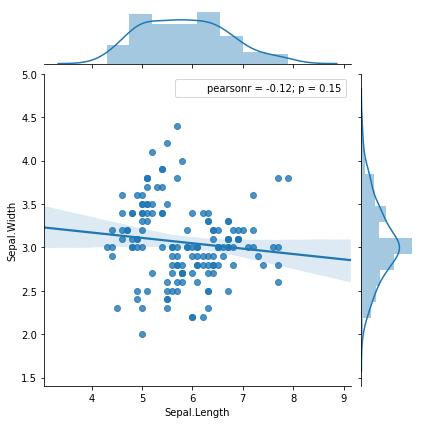

In [25]:
sns.jointplot('Sepal.Length','Sepal.Width',data=iris,kind='reg')

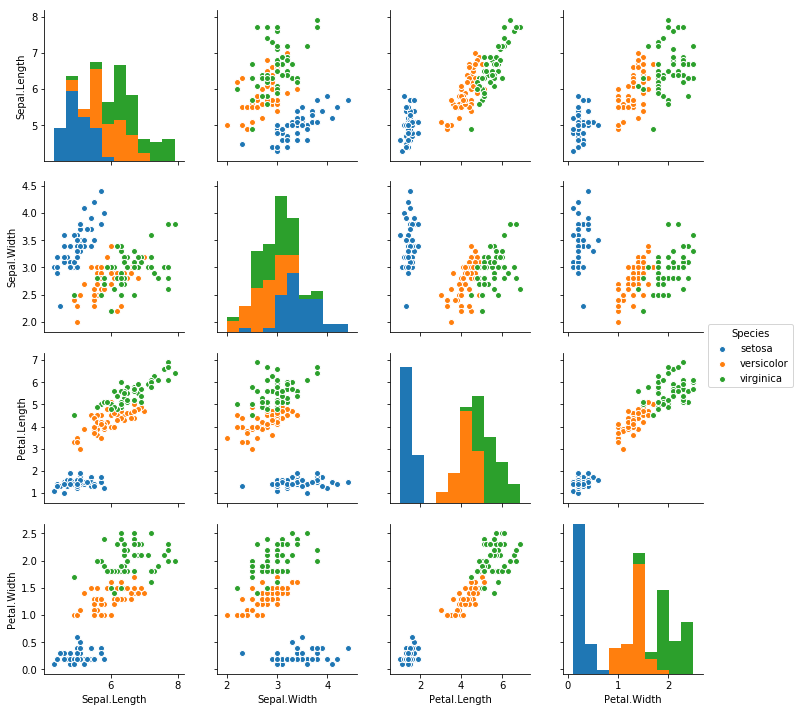

In [29]:
sns.pairplot(iris,hue='Species',kind='scatter',)

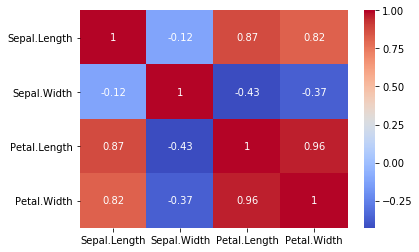

In [33]:
sns.heatmap(iris.corr(),annot=True,annot_kws={"size": 10},cmap='coolwarm')

In [35]:
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [36]:
iris['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [40]:
iris['Species'].replace(['setosa','versicolor','virginica'],[1,2,3],inplace=True)

In [46]:
x = iris.drop('Species',axis=1)
y= iris['Species']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

In [49]:
pred = knn.predict(X_test)
pred

array([2, 3, 3, 1, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 1, 1, 2, 3, 1,
       2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 3, 1, 3, 3, 2, 1, 1, 2], dtype=int64)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[15  0  0]
 [ 0 16  0]
 [ 0  0 14]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        16
          3       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        45



In [51]:
error_rate = []

In [52]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(knn.score(X_test,y_test))

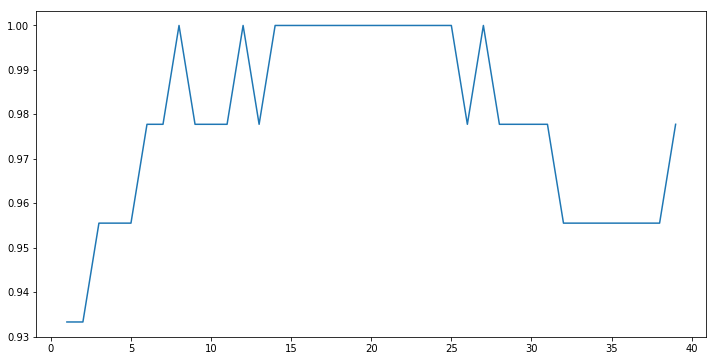

In [53]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate)